<a href="https://colab.research.google.com/github/AisIzmailova/AisIzmailova_Practice_Notebooks/blob/master/DL_Convolutional_Neural_Networks_Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Convolutional Neural Network (CNN) and Computer Vision with Tensorflow

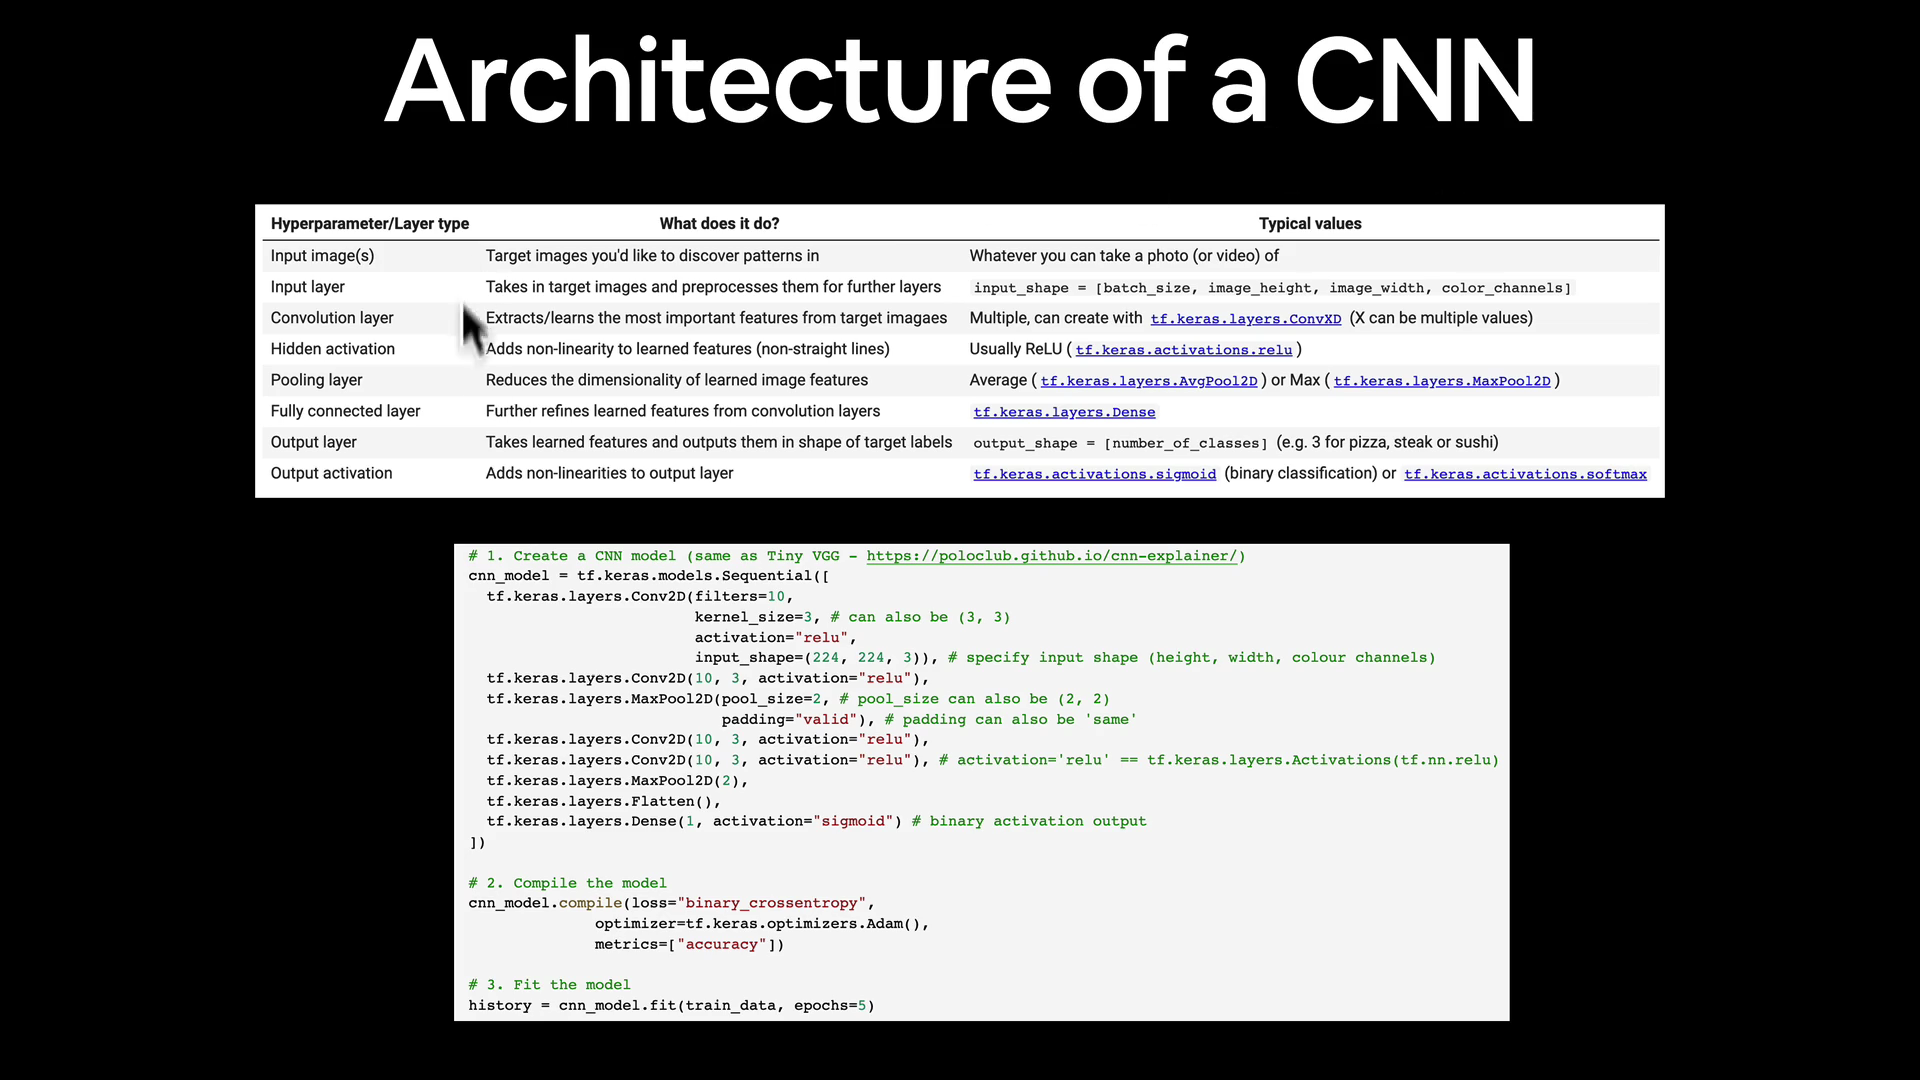

📖 Read: poloclub.github.io/cnn-explainer/

The images we are working with are from the Food 101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, the data was modified to use only two classes (pizza & steak) using the image data modification notebook (https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb)

**Note** We start with smaller dataset so that we can experiment quickly and figure what works.

In [1]:
#Get data from Food101 Kaggle

import zipfile
#!wget is the command to download the file into colab folder
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2023-12-22 20:55:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 142.250.107.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   123MB/s    in 0.9s    

2023-12-22 20:55:59 (123 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#Unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

##Inspect the data

A very cruical step at the beginning of any machine learning project is becoming one with the data. And for computer vision project, this usually means visuzalizing many samples of your data.


In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
# !ls pizza_steak/train/steak

In [6]:
import os
#Walk through the pizza steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [7]:
#Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names.

In [8]:
#Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
print(data_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

pizza_steak/train


array(['pizza', 'steak'], dtype='<U5')

Visualize images

In [9]:
#Vizualize images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:  {img.shape}")
  return img

['2755875.jpg']
Image shape:  (384, 512, 3)


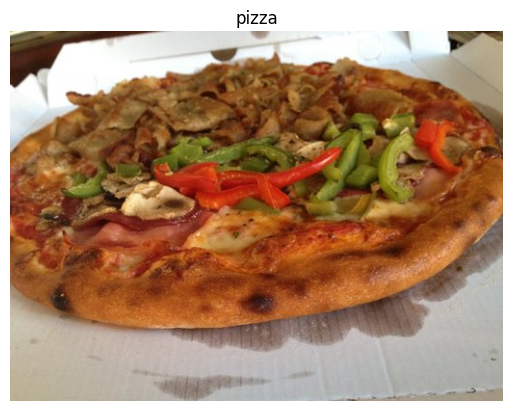

In [10]:
#View random image from training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                        target_class = "pizza")

In [11]:
#Show image pixel values
img

array([[[209, 205, 157],
        [217, 213, 165],
        [226, 223, 178],
        ...,
        [106,  90,  67],
        [108,  93,  70],
        [107,  92,  69]],

       [[237, 233, 186],
        [243, 239, 194],
        [250, 247, 204],
        ...,
        [100,  84,  59],
        [106,  90,  65],
        [108,  94,  68]],

       [[255, 255, 217],
        [255, 255, 214],
        [254, 250, 212],
        ...,
        [ 92,  75,  45],
        [ 99,  82,  52],
        [104,  89,  58]],

       ...,

       [[187, 178, 149],
        [187, 178, 149],
        [186, 177, 148],
        ...,
        [166, 151, 130],
        [167, 152, 131],
        [167, 152, 131]],

       [[182, 173, 144],
        [183, 174, 145],
        [185, 176, 147],
        ...,
        [164, 152, 128],
        [167, 152, 129],
        [168, 153, 130]],

       [[181, 172, 143],
        [183, 174, 145],
        [185, 176, 147],
        ...,
        [164, 152, 128],
        [168, 153, 130],
        [169, 154, 131]]

Convert images into a tensor

In [12]:
#Convert array of pixels into a tensor
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[209, 205, 157],
        [217, 213, 165],
        [226, 223, 178],
        ...,
        [106,  90,  67],
        [108,  93,  70],
        [107,  92,  69]],

       [[237, 233, 186],
        [243, 239, 194],
        [250, 247, 204],
        ...,
        [100,  84,  59],
        [106,  90,  65],
        [108,  94,  68]],

       [[255, 255, 217],
        [255, 255, 214],
        [254, 250, 212],
        ...,
        [ 92,  75,  45],
        [ 99,  82,  52],
        [104,  89,  58]],

       ...,

       [[187, 178, 149],
        [187, 178, 149],
        [186, 177, 148],
        ...,
        [166, 151, 130],
        [167, 152, 131],
        [167, 152, 131]],

       [[182, 173, 144],
        [183, 174, 145],
        [185, 176, 147],
        ...,
        [164, 152, 128],
        [167, 152, 129],
        [168, 153, 130]],

       [[181, 172, 143],
        [183, 174, 145],
        [185, 176, 147],
        ...,
        [164, 152, 12

Normalize data




In [13]:
img/255.

array([[[0.81960784, 0.80392157, 0.61568627],
        [0.85098039, 0.83529412, 0.64705882],
        [0.88627451, 0.8745098 , 0.69803922],
        ...,
        [0.41568627, 0.35294118, 0.2627451 ],
        [0.42352941, 0.36470588, 0.2745098 ],
        [0.41960784, 0.36078431, 0.27058824]],

       [[0.92941176, 0.91372549, 0.72941176],
        [0.95294118, 0.9372549 , 0.76078431],
        [0.98039216, 0.96862745, 0.8       ],
        ...,
        [0.39215686, 0.32941176, 0.23137255],
        [0.41568627, 0.35294118, 0.25490196],
        [0.42352941, 0.36862745, 0.26666667]],

       [[1.        , 1.        , 0.85098039],
        [1.        , 1.        , 0.83921569],
        [0.99607843, 0.98039216, 0.83137255],
        ...,
        [0.36078431, 0.29411765, 0.17647059],
        [0.38823529, 0.32156863, 0.20392157],
        [0.40784314, 0.34901961, 0.22745098]],

       ...,

       [[0.73333333, 0.69803922, 0.58431373],
        [0.73333333, 0.69803922, 0.58431373],
        [0.72941176, 0

##Binary Classification example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Fit the CNN model to our training data

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#Preprocess data (normalize pixel values)
train_datagen = ImageDataGenerator(rescale=1/255.)
valid_datagen = ImageDataGenerator(rescale=1/255.)

#Setup path to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                            batch_size=32,
                                            target_size=(224,224),
                                            class_mode="binary",
                                            seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

#Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    # tf.keras.layers.Activations(tf.nn.relu) #alternative way to set activations
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 234ms/step - loss: 0.5864 - accuracy: 0.6867 - val_loss: 0.4373 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.4456 - accuracy: 0.8027 - val_loss: 0.3706 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.4291 - accuracy: 0.8153 - val_loss: 0.3972 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 7s 141ms/step - loss: 0.3487 - accuracy: 0.8513 - val_loss: 0.3242 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.2622 - accuracy: 0.8973 - val_loss: 0.3671 - val_accuracy: 0.8300


**Note** We changed runtime to GPU

In [15]:
#Evaluate the model
model_1.evaluate(valid_data)

16/16 [==============================] - 1s 83ms/step - loss: 0.3671 - accuracy: 0.8300


[0.3671052157878876, 0.8299999833106995]

In [16]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

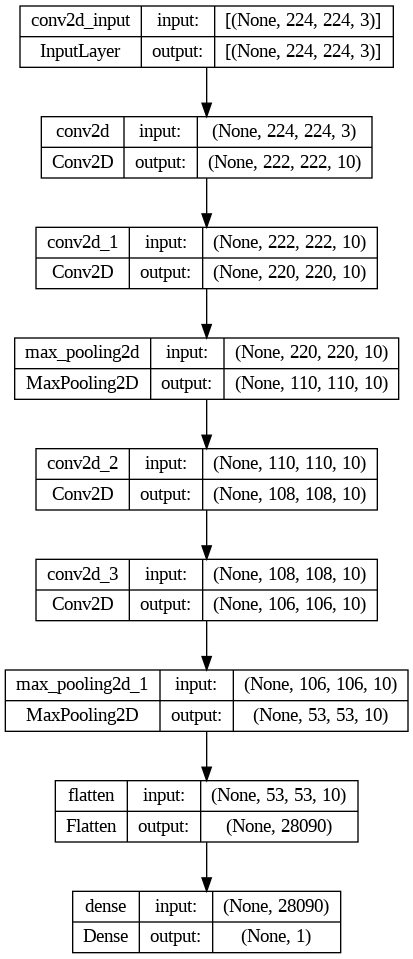

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, show_shapes=True)

In [18]:
#Predict
y_preds=model_1.predict(valid_data)

16/16 [==============================] - 1s 82ms/step


##Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we are building is from [Tensorflow playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,2&seed=0.45850&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

In [19]:
#Set random seed
tf.random.set_seed(42)

#Build the model
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 131ms/step - loss: 0.7041 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 116ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


How can we improve the model to get better results?

Despite having x20 parameters, the second model performs way worse than the first model.

In [21]:
#Set random seed
tf.random.set_seed(42)

#Create the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

#Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#Fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Epoch 1/5
47/47 [==============================] - 10s 176ms/step - loss: 2.4485 - accuracy: 0.6120 - val_loss: 0.8308 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 5s 108ms/step - loss: 1.4729 - accuracy: 0.6720 - val_loss: 0.6221 - val_accuracy: 0.7320
Epoch 3/5
47/47 [==============================] - 7s 143ms/step - loss: 0.8195 - accuracy: 0.7000 - val_loss: 0.6229 - val_accuracy: 0.7500
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6420 - accuracy: 0.7400 - val_loss: 0.4597 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6867 - accuracy: 0.7313 - val_loss: 0.5657 - val_accuracy: 0.7680


In [22]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Note** We can think of trainable parameters as patterns a model can learn from data. Intuitively, we might think more is better, and in a lots of cases, it is. But in this case, the difference here is the two different styles of model we are using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, a convolutional neural network seeks to sort out and learn the most important patterns in an image. So even though these learnable parameters in our convolutional neural network, these are often more helpful in deciphering between different features in an image.

##Binary Classification Breakdown

1. Become one with data
2. Preprocess the data
3. Create the model
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model
7. Repeat until satisfied

### 1. Become one with data

['2788759.jpg']
Image shape:  (512, 512, 3)
['898843.jpg']
Image shape:  (512, 512, 3)


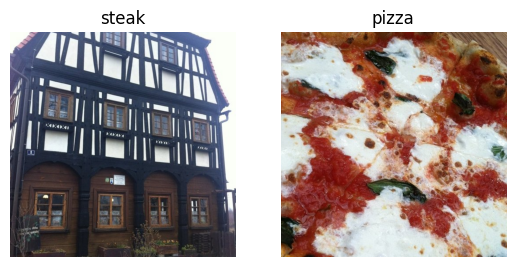

In [23]:
#Visualize data
import matplotlib.pyplot as plt
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess data

Define directory dataset paths

In [24]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test"

Define batches

A batch is a small subset of data. Rather than looking at all data at a time, a model can look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the mempory of our processor (GPU).
2. Trying to learn patterns in 10,000 images in one hit could result in the model not being able to learn very well. Default batch size - 32.


In [25]:
#Check GPU
!nvidia-smi

Fri Dec 22 20:58:28 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P0              31W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Create data generators

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

Load data from directories and split into batches

In [27]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Get a samle of train data batch

In [28]:
images, labels = train_data.next() #get the next batch of images, labels in train data
len(images), len(labels)

(32, 32)

In [29]:
len(train_data) #32 images in one batch, overall 47 batches

47

In [30]:
images[0], images[0].shape

(array([[[0.18431373, 0.10196079, 0.01960784],
         [0.23529413, 0.15686275, 0.0627451 ],
         [0.33333334, 0.2392157 , 0.14509805],
         ...,
         [0.43137258, 0.20784315, 0.03921569],
         [0.454902  , 0.2392157 , 0.08627451],
         [0.34901962, 0.12941177, 0.        ]],
 
        [[0.12156864, 0.02352941, 0.        ],
         [0.1764706 , 0.07058824, 0.        ],
         [0.3647059 , 0.24313727, 0.16078432],
         ...,
         [0.4784314 , 0.26666668, 0.09411766],
         [0.4666667 , 0.2509804 , 0.09803922],
         [0.50980395, 0.29803923, 0.14901961]],
 
        [[0.30588236, 0.18039216, 0.09019608],
         [0.41960788, 0.28235295, 0.19607845],
         [0.42352945, 0.28235295, 0.18823531],
         ...,
         [0.43921572, 0.23137257, 0.05882353],
         [0.5176471 , 0.31764707, 0.14901961],
         [0.43137258, 0.227451  , 0.07058824]],
 
        ...,
 
        [[0.74509805, 0.56078434, 0.39607847],
         [0.64705884, 0.4784314 , 0.30980

In [31]:
labels[0] #1 for steak, 0 for pizza

1.0

Text(0.5, 1.0, '1.0')

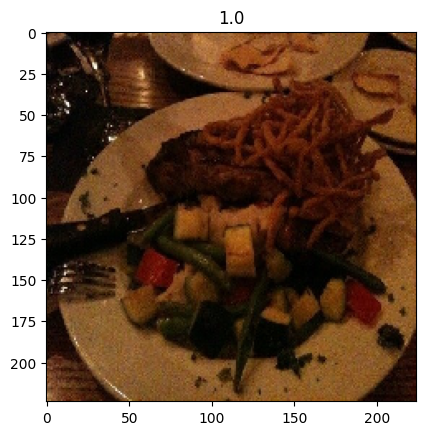

In [32]:
plt.imshow(images[0])
plt.title(labels[0])

### 3. Create the model

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment, you try to beat the baseline.

**Note** In deep learning there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required.

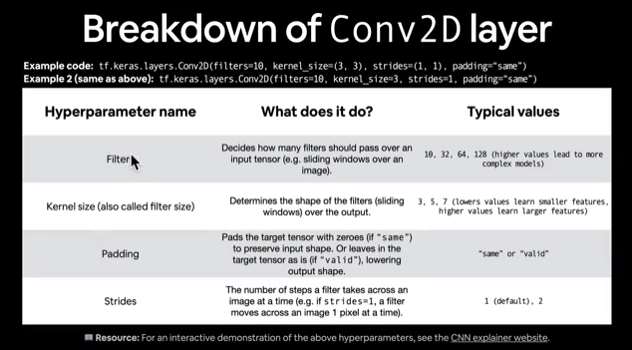

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

#Creat the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=4,
           strides=1,
           padding="valid", #if same, output shape is same as input shape, if valid, output shape gets compressed
           activation="relu",
           input_shape=(224,224,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

#Compile the model
model_4.compile(
     loss="binary_crossentropy",
     optimizer = Adam(),
     metrics=["accuracy"]
)

### 4. Fit the model

In [34]:
#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 166ms/step - loss: 0.6804 - accuracy: 0.6787 - val_loss: 0.3872 - val_accuracy: 0.8320
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4267 - accuracy: 0.8153 - val_loss: 0.4313 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 8s 166ms/step - loss: 0.3182 - accuracy: 0.8787 - val_loss: 0.3656 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.1753 - accuracy: 0.9387 - val_loss: 0.3728 - val_accuracy: 0.8240
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.0788 - accuracy: 0.9773 - val_loss: 0.5042 - val_accuracy: 0.8140


### 5. Evaluate the model

In [35]:
model_4.evaluate(test_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.5042 - accuracy: 0.8140


[0.5042180418968201, 0.8140000104904175]

In [36]:
history_4.history

{'loss': [0.6803895831108093,
  0.42670679092407227,
  0.3182162642478943,
  0.17527778446674347,
  0.07881041616201401],
 'accuracy': [0.6786666512489319,
  0.8153333067893982,
  0.8786666393280029,
  0.9386666417121887,
  0.9773333072662354],
 'val_loss': [0.38723036646842957,
  0.4312501847743988,
  0.3656352758407593,
  0.3728012144565582,
  0.5042180418968201],
 'val_accuracy': [0.8320000171661377,
  0.7979999780654907,
  0.8320000171661377,
  0.8240000009536743,
  0.8140000104904175]}

<Axes: title={'center': 'Model data'}>

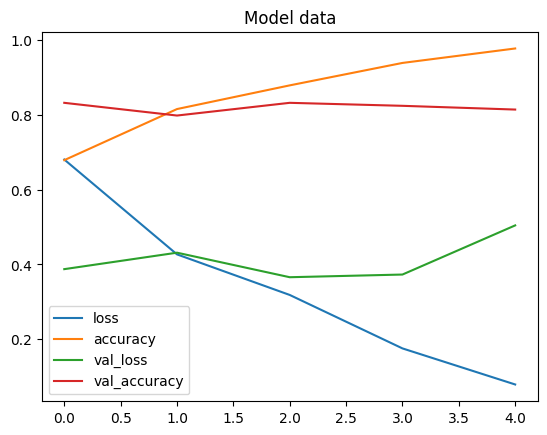

In [37]:
import pandas as pd
pd.DataFrame(history_4.history).plot(title="Model data")

In [38]:
#Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for traiing anyd validation metrics.
  """
  loss=history.history["loss"]
  val_loss=history.history["val_loss"]
  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))

  plt.plot(epochs,loss, label="training_loss")
  plt.plot(epochs,val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy, label="accuracy")
  plt.plot(epochs,val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

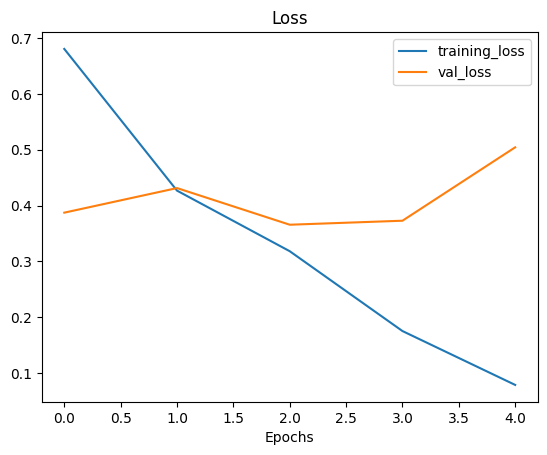

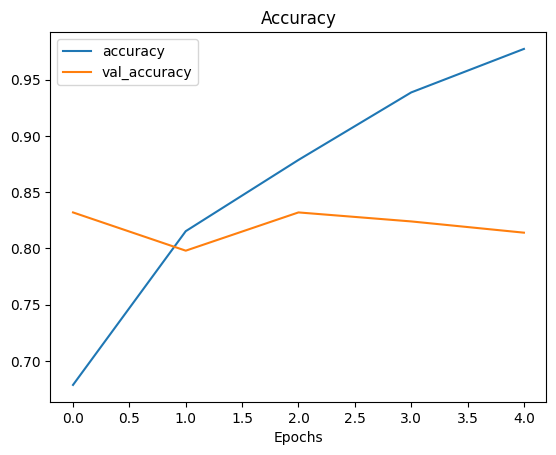

In [39]:
plot_loss_curves(history_4)

**Note** When a model's validation loss starts to increase, it is likely that the model is overfitting the training dataset. This means, it is learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

### 6. Adjust different parameters and improve the model

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flatten layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layer
* Add more data

Adding regularization (adding MaxPool2D layer)

In [40]:
#Creare a model

model_5 = Sequential([
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")
])

#Compile the model
model_5.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

In [41]:
#Fit the model
history_5=model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 8s 137ms/step - loss: 0.5982 - accuracy: 0.6993 - val_loss: 0.4514 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 5s 112ms/step - loss: 0.4426 - accuracy: 0.8100 - val_loss: 0.3827 - val_accuracy: 0.8220
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3556 - accuracy: 0.8587 - val_loss: 0.3457 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.2964 - accuracy: 0.8793 - val_loss: 0.3069 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.2608 - accuracy: 0.9053 - val_loss: 0.2967 - val_accuracy: 0.8760


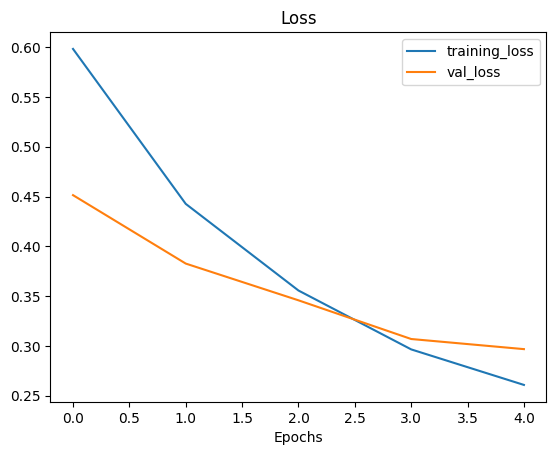

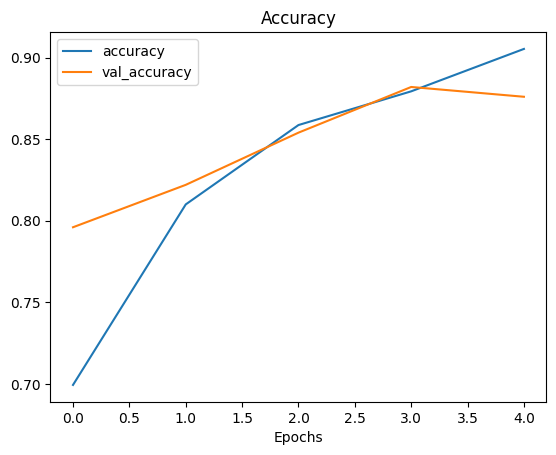

In [42]:
#Evaluate the model
plot_loss_curves(history_5)

Adding data augmentation

In [43]:
#Create ImageDataGenerator training instance with augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, #rotates the image
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)
#Create ImageDataGenerator without augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean asjusting the rotation of an image, flipping it, cropping it or something similar.

In [44]:
#Let's visualize data augmentation
print("Augmented training data")
train_data_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=False)
print("Non Augmented training data")
train_data=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)

print("Non Augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode="binary",
                                           shuffle=False)


Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented training data
Found 1500 images belonging to 2 classes.
Non Augmented test data
Found 500 images belonging to 2 classes.


**Note** Data augmentation is usually only performed on training data. Using `ImageDataGenerator` built-in data augmentation paramteres our images are left as they are in the directories but are modified as they are loaded into the model.

In [45]:
#Get sample data batches
images,labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

Text(0.5, 1.0, 'Augmented image')

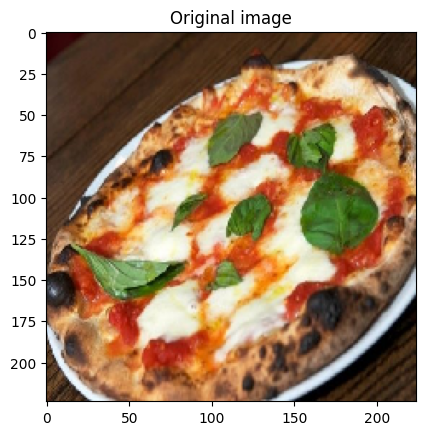

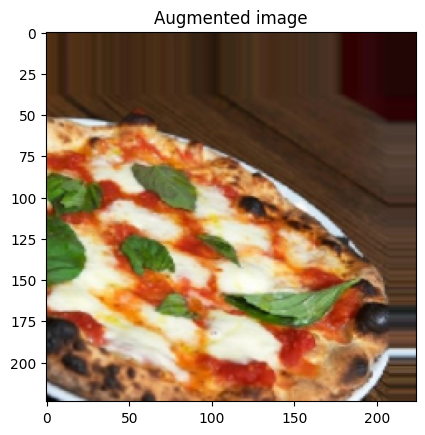

In [46]:
import random
random_number =random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")

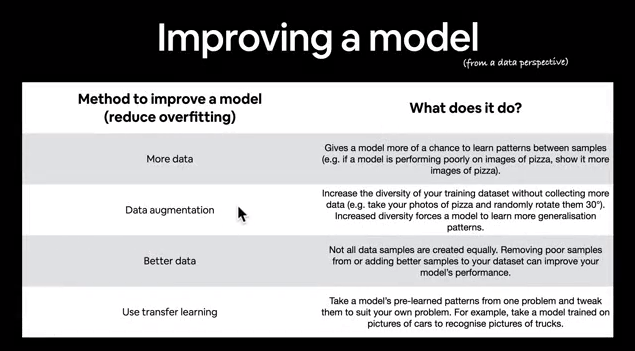

Use augmented data to train the model

In [47]:
#Create the model
model_6 = Sequential([
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid") #sigmoid because binary classification, softmax for multiclass classification
])

#Compile the model
model_6.compile(
    loss="binary_crossentropy", #binary_crossentropy because binary classfication, categorical or sparse categorical cross entropy for multiclass classification
    optimizer=Adam(),
    metrics=["accuracy"]
)

#Fit the model
history_6=model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 436ms/step - loss: 0.8506 - accuracy: 0.4700 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6889 - accuracy: 0.5640 - val_loss: 0.6488 - val_accuracy: 0.6660
Epoch 3/5
47/47 [==============================] - 22s 462ms/step - loss: 0.6811 - accuracy: 0.5920 - val_loss: 0.6107 - val_accuracy: 0.7180
Epoch 4/5
47/47 [==============================] - 21s 458ms/step - loss: 0.6800 - accuracy: 0.6160 - val_loss: 0.6569 - val_accuracy: 0.6720
Epoch 5/5
47/47 [==============================] - 21s 436ms/step - loss: 0.6531 - accuracy: 0.6040 - val_loss: 0.5338 - val_accuracy: 0.7240


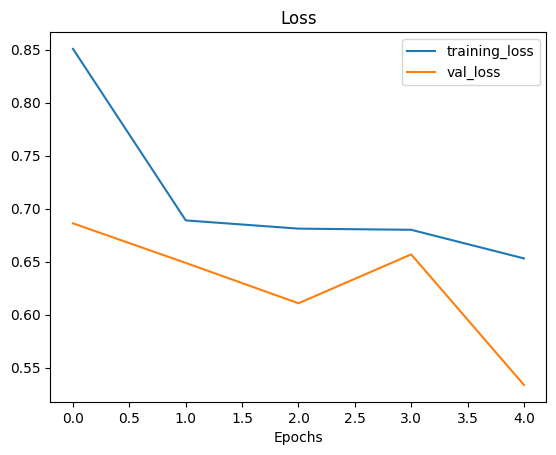

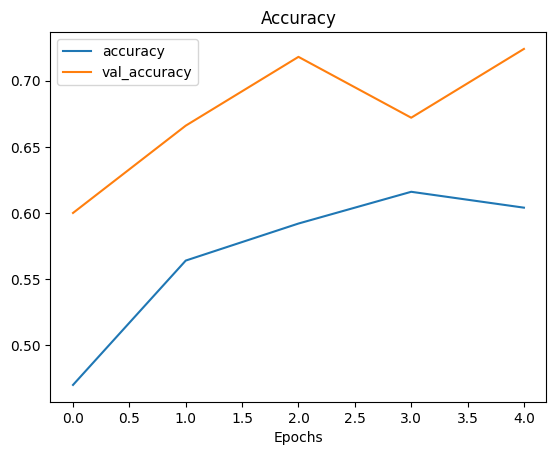

In [48]:
#Evaluate the model
plot_loss_curves(history_6)

Let's recreate augmented data but re-shuffle it and re-train our model.

In [49]:
#Let's visualize data augmentation
print("Augmented training data")
train_data_augmented_shuffled=train_datagen_augmented.flow_from_directory(train_dir,
                                                                 target_size=(224,224),
                                                                 batch_size=32,
                                                                 class_mode="binary",
                                                                 shuffle=True)

Augmented training data
Found 1500 images belonging to 2 classes.


In [50]:
#Create the model
model_7 = Sequential([
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Conv2D(10,3,activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")
])

#Compile the model
model_7.compile(
    loss="binary_crossentropy",
    optimizer=Adam(),
    metrics=["accuracy"]
)

#Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 31s 645ms/step - loss: 0.6285 - accuracy: 0.6427 - val_loss: 0.4386 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 21s 432ms/step - loss: 0.5146 - accuracy: 0.7460 - val_loss: 0.3541 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4888 - accuracy: 0.7607 - val_loss: 0.3401 - val_accuracy: 0.8380
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.4972 - accuracy: 0.7733 - val_loss: 0.3454 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 21s 459ms/step - loss: 0.4627 - accuracy: 0.7993 - val_loss: 0.3046 - val_accuracy: 0.8880


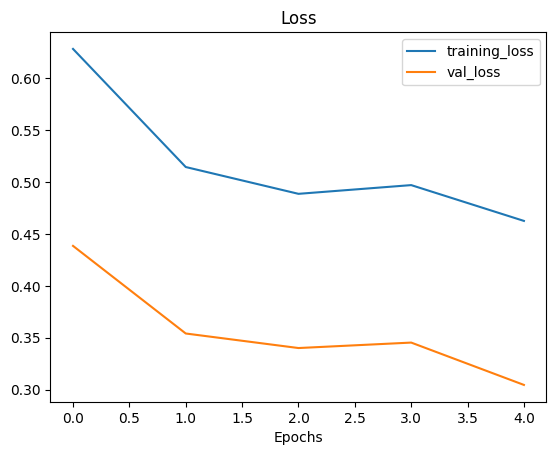

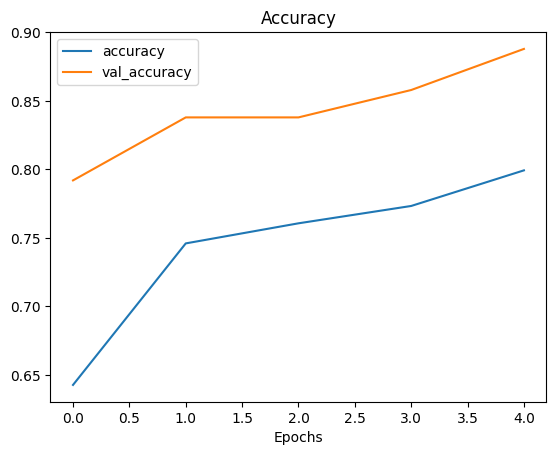

In [51]:
#Evaluate the model
plot_loss_curves(history_7)

**Note** When shuffling data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide variety of images (pizza & steak at the same time instead of learning sequentially through pizza and then through steak).

### 7. Repeat until satisfied

Since we have already beaten out baseline model, there are few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more Conv2D layers)
* Increase the number of filters in each convolutional layer
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data
* Use **transfer learning** to leverage what another image model has learned and adjust our own use case

Making prediction with out trained model on our own custom data

In [52]:
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2023-12-22 21:04:27--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15814 (15K) [text/plain]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]  15.44K  --.-KB/s    in 0.008s  

2023-12-22 21:04:27 (1.95 MB/s) - ‘03-steak.jpeg’ saved [15814/15814]



(-0.5, 511.5, 511.5, -0.5)

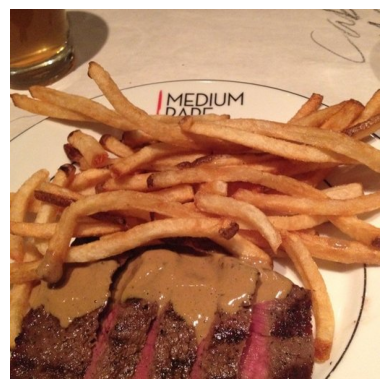

In [53]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image
steak = mpimg.imread("/content/pizza_steak/train/steak/1098844.jpg")
plt.imshow(steak)
plt.axis(False)

In [54]:
steak.shape

(512, 512, 3)

Create a function to import an image and resize it to be able to be used with our model

In [55]:
def load_and_prep_image(filename,img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
  """
  #Read the image
  img = tf.io.read_file(filename)
  #Decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  #Rescale the image (get all values btwn 0 and 1)
  img=img/255.
  return img

In [63]:
steak_image = load_and_prep_image("/content/pizza_steak/test/steak/100274.jpg", 224)

In [57]:
steak_image.shape

TensorShape([224, 224, 3])

Try predicting with our model on the image

In [69]:
pred_steak = model_7.predict(tf.expand_dims(steak_image, axis=0))

1/1 [==============================] - 0s 33ms/step


In [59]:
pizza_image = load_and_prep_image("/content/pizza_steak/test/pizza/1001116.jpg", 224)

In [70]:
pred_pizza = model_7.predict(tf.expand_dims(pizza_image, axis=0))

1/1 [==============================] - 0s 26ms/step


In [65]:
class_names

array(['pizza', 'steak'], dtype='<U5')

We can index the predicted class by rounding the prediction probability and indexing it on class names.

In [72]:
pred_class = class_names[int(tf.round(pred_pizza))]
pred_class

'pizza'

In [71]:
pred_class = class_names[int(tf.round(pred_steak))]
pred_class

'steak'

In [79]:
def pred_and_plot(model, filename, class_names = class_names):
  """
  Imports an image located at filename, makes prediction with the model and plots the image with the predicted class the title.
  """

  #Import the target image and preprocess it
  img = load_and_prep_image(filename)

  #Make prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  #Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  #Plot the image
  plt.imshow(img)
  plt.title(f"Prediction:  {pred_class}")
  plt.axis(False)


1/1 [==============================] - 0s 41ms/step


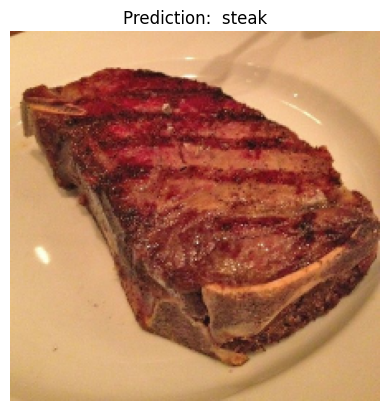

In [80]:
pred_and_plot(model_7, "/content/pizza_steak/test/steak/1166047.jpg", class_names)